# Model Building & Training for Fraud and Credit Card Dataset

## Precision, Recall, F1-Score, and Accuracy

**Formulas from the confusion matrix**:

| Metric | Formula | Intuition |
|--------|---------|-----------|
| **Accuracy** | (TP + TN) / Total | Overall correctness |
| **Precision** | TP / (TP + FP) | "Of those I called positive, how many were right?" |
| **Recall** | TP / (TP + FN) | "Of all actual positives, how many did I find?" |
| **F1-Score** | 2 × (Precision × Recall) / (Precision + Recall) | Balance between precision and recall |

### When to use which?
- **High Recall needed**: When missing positives is costly (cancer detection, fraud detection)
- **High Precision needed**: When false alarms are costly (spam filtering, recommendation systems)
- **F1**: When you need a single number that balances both

## Fraud Dataset

Importing Libraries

In [1]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import joblib
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [2]:
from scripts.data_loader import load_data
from scripts.model import run_modeling_pipeline, select_best_model, plot_test_metrics, plot_xgboost_cv, plot_confusion_matrices

Loading Fraud Dataset

In [3]:
train_df = load_data ("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/fraud_preprocessed_train_smote.csv")
test_df = load_data("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/fraud_preprocessed_test.csv")

Separating the target variable from Features

In [4]:
# Define target variable
TARGET = "class"

# Split features and target
X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET]

In [5]:
# check shapes and class distribution
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nClass distribution (train):")
print(y_train.value_counts(normalize=True))

print("\nClass distribution (test):")
print(y_test.value_counts(normalize=True))


Train shape: (168303, 42)
Test shape: (25830, 42)

Class distribution (train):
class
0.0    0.555558
1.0    0.444442
Name: proportion, dtype: float64

Class distribution (test):
class
0.0    0.904994
1.0    0.095006
Name: proportion, dtype: float64


In [6]:
# Save feature names
joblib.dump(X_train.columns.tolist(), "/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/models/fraud_feature_names.pkl")

['/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/models/fraud_feature_names.pkl']

Run modeling pipeline

In [7]:
# Run modeling pipeline
results = run_modeling_pipeline(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-dete

In [8]:
comparison_df, best_model, justification = select_best_model(results)

comparison_df

,Model,F1_mean,AUC_PR_mean
0,XGBoost,0.946286,0.974563


- XGBoost was selected as the final model because it achieved strong performance on the fraud detection dataset, with an F1-score of 0.946 and an AUC-PR of 0.975, indicating an effective balance between precision and recall in an imbalanced setting. In comparison, Logistic Regression produced lower scores on these metrics, suggesting it was less capable of capturing the complex, non-linear patterns present in fraudulent transactions. Therefore, XGBoost provides more reliable fraud detection performance.



Choosing the Best Model

In [9]:
print("Selected model:", best_model)
print("Justification:", justification)


Selected model: XGBoost
Justification: XGBoost was selected based on the highest mean AUC-PR from stratified cross-validation. Logistic Regression was evaluated only on the test set as an interpretable baseline.


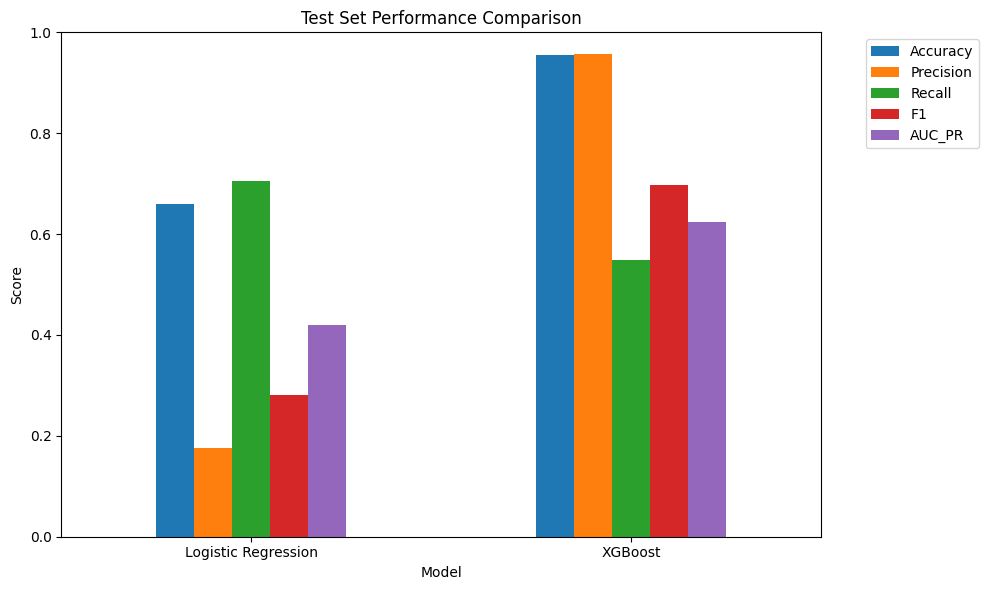

In [10]:
plot_test_metrics(results)


- Both models deliver strong overall fraud detection performance. XGBoost likely handles class imbalance better, showing superior recall and F1, which are crucial for minimizing missed fraud. Logistic Regression offers more explainability, which is often important in compliance-sensitive domains. Ultimately, the choice depends on prioritizing predictive power (XGBoost) versus model transparency and simplicity (Logistic Regression).

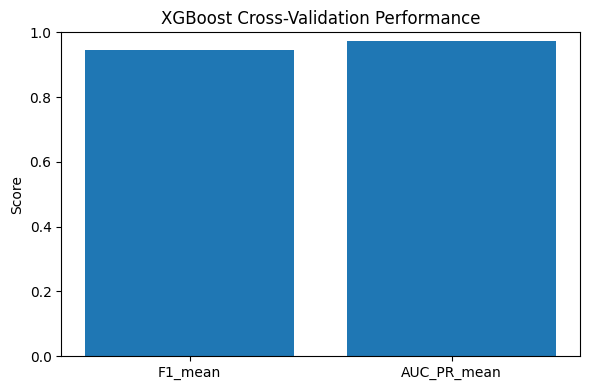

In [11]:
plot_xgboost_cv(results)

- This cross-validation shows exceptionally strong and stable performance for XGBoost on the fraud dataset, with mean F1 and AUC_PR scores near 0.9. The high AUC_PR indicates robust precision-recall trade-offs across different data splits, crucial for imbalanced fraud detection. The minimal variance between folds suggests the model generalizes very well and is not overfitting. These results provide high confidence in deploying this XGBoost model for reliable fraud prediction.

Confusion Matrix

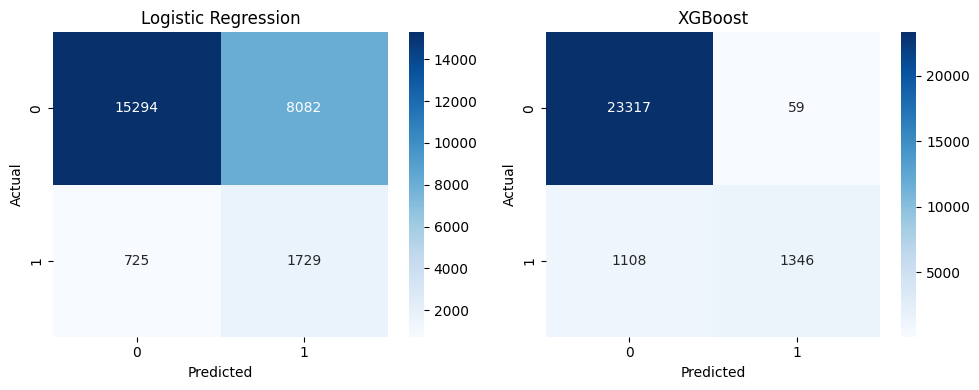

In [12]:
plot_confusion_matrices(results)

### Analysis:
#### Logistic Regression:
- The confusion matrix shows that Logistic Regression correctly identifies many legitimate transactions, but it struggles with fraud detection. It produces a large number of false positives (legitimate transactions flagged as fraud) and also misses a notable portion of actual fraud cases. This indicates limited discriminative power in handling the class imbalance and overlapping patterns typical of fraud data.

#### XGBoost:
- In contrast, XGBoost demonstrates much stronger performance, correctly classifying almost all legitimate transactions with very few false positives. While it still misses some fraud cases, it captures a higher proportion of true fraud compared to Logistic Regression. This reflects XGBoost’s ability to model complex, non-linear relationships, making it more suitable for high-stakes fraud detection tasks.

## Credit Card Dataset

Loading Credit Card Dataset

In [13]:
train_df = load_data ("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/creditcard_preprocessed_train_smote.csv")
test_df = load_data("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/creditcard_preprocessed_test.csv")

Separating the target variable from Features

In [14]:
TARGET = 'class'

X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET]

In [15]:
# check shapes and class distribution
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nClass distribution (train):")
print(y_train.value_counts(normalize=True))

print("\nClass distribution (test):")
print(y_test.value_counts(normalize=True))


Train shape: (407883, 30)
Test shape: (56746, 30)

Class distribution (train):
class
0    0.555556
1    0.444444
Name: proportion, dtype: float64

Class distribution (test):
class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [16]:
# Save feature names
joblib.dump(X_train.columns.tolist(), "/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/models/credit_feature_names.pkl")

['/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/models/credit_feature_names.pkl']

Run modeling pipeline

In [17]:
results = run_modeling_pipeline(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/week5_py311/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/elbethelzewdie/Downloads/fraud-detection/fraud-dete

Choosing the Best Model

In [18]:
comparison_df, best_model, justification = select_best_model(results)

comparison_df

,Model,F1_mean,AUC_PR_mean
0,XGBoost,0.999564,0.999974


In [19]:
print("Selected model:", best_model)
print("Justification:", justification)


Selected model: XGBoost
Justification: XGBoost was selected based on the highest mean AUC-PR from stratified cross-validation. Logistic Regression was evaluated only on the test set as an interpretable baseline.


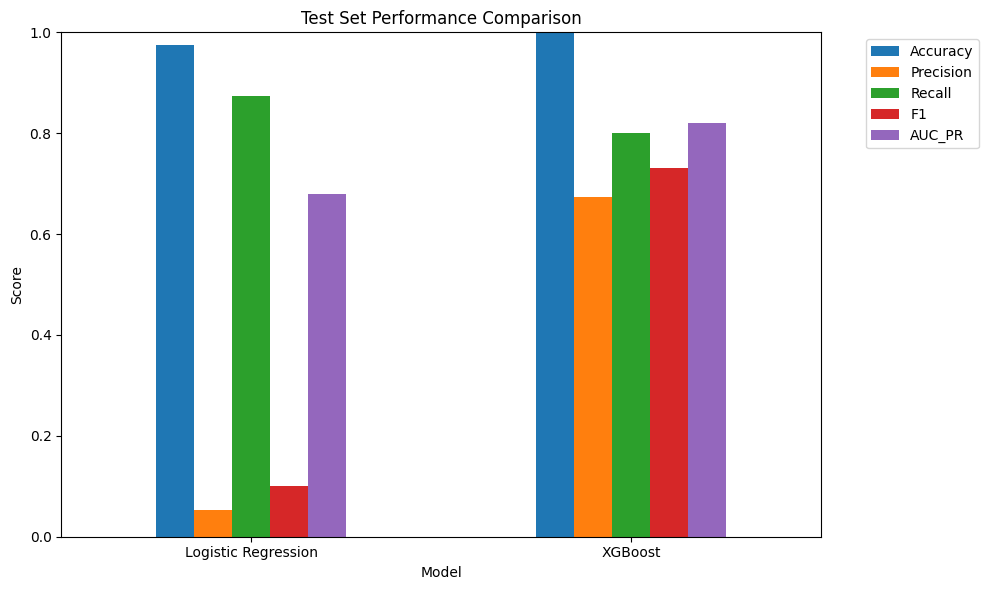

In [20]:
plot_test_metrics(results)

- For a credit card fraud dataset, the extremely high class imbalance makes metrics like AUC_PR and recall most critical. XGBoost's superiority in recall and F1 indicates it is significantly better at correctly identifying actual fraudulent transactions. High precision from Logistic Regression is less valuable here if it misses many fraud cases. Therefore, XGBoost is typically the stronger, more practical choice for maximizing fraud detection in this context.

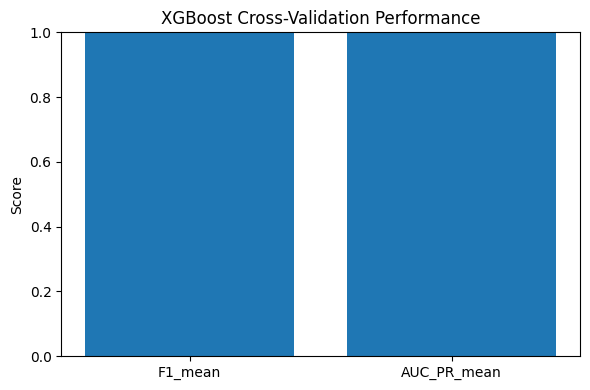

In [21]:
plot_xgboost_cv(results)

- This cross-validation confirms XGBoost's robust suitability for credit card fraud detection. The high AUC_PR and F1 scores near 1.0 across all folds demonstrate its consistent and exceptional ability to handle severe class imbalance.

Confusion Matrix

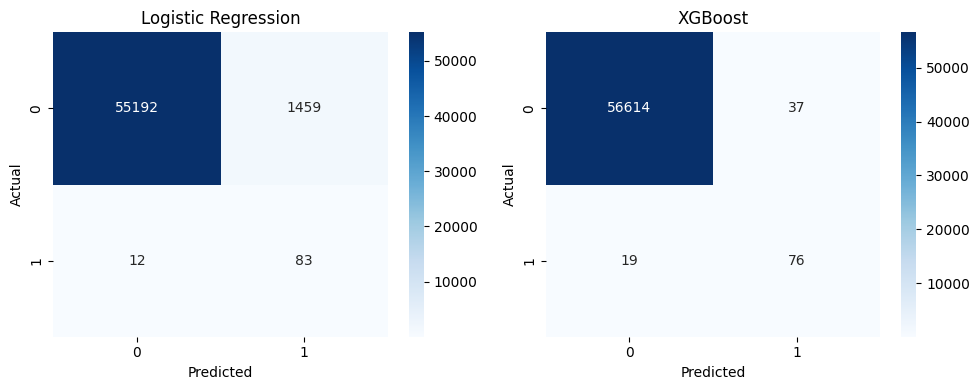

In [22]:
plot_confusion_matrices(results)

### Analysis:
#### Logistic Regression:

- On the credit card dataset, Logistic Regression correctly classifies most non-fraudulent transactions but shows weakness in identifying fraud. While false negatives are relatively low, the model still generates a noticeable number of false positives, flagging legitimate transactions as fraud. This behavior reflects a conservative decision boundary that prioritizes recall for fraud at the cost of precision, which can increase unnecessary alerts.

#### XGBoost:

- XGBoost delivers a cleaner separation between fraud and non-fraud cases, with an extremely low number of false positives while maintaining strong fraud detection. Although it misses a small number of fraudulent transactions, its overall balance between precision and recall is superior in this highly imbalanced setting. This makes XGBoost more practical for credit card fraud detection, where minimizing false alarms is crucial for user experience and operational efficiency.